# Linear Regression algorithm from scratch

$$ y = mx + b $$
* Best fit slope $m$ is given by,
$$ m = \frac{\overline{x}\overline{y} - \overline{xy}}{(\overline{x})^2 - \overline{x^2}}$$

* Intercept $b$ is given by,
$$ b = \overline{y} - m \overline{x}

In [12]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style 
import random

style.use('fivethirtyeight')

In [5]:
xs = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
ys = np.array([5, 4, 6, 5, 6, 7], dtype=np.float64)

In [6]:
def best_fit_slope(xs, ys):
    if(mean(xs) ** 2 - mean(xs ** 2) == 0):
        return 1e6

    m = (mean(xs) * mean(ys) - mean(xs * ys)) / (mean(xs) ** 2 - mean(xs ** 2))
    return m

def best_intercept(xs, ys, m):
    b = mean(ys) - m * mean(xs)
    return b

In [7]:
m = best_fit_slope(xs, ys)
b = best_intercept(xs, ys, m)
y_hat = m * xs + b

## Plotting

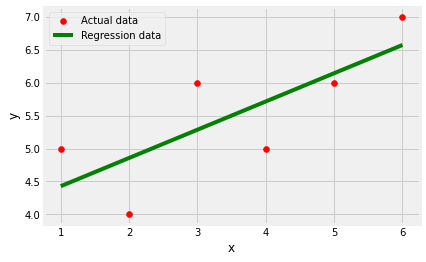

In [8]:
plt.figure()
plt.scatter(xs, ys, label='Actual data', color='r')
plt.plot(xs, y_hat, label='Regression data', color='g')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [9]:
## Prediction
x_val = 8
predict_y = m * x_val + b
print(predict_y)

7.428571428571429


## Measure of line fitting

One of the metrics to measure how good a line fits the data is the coefficient of determination, $r^2$ which is given by
$$ r^2 = 1 - \frac{\sum_{i=0}^{n-1}(y_i - \hat{y_i}) ^ 2}{\sum_{i=0}^{n-1}(y_i - \overline{y}) ^ 2} $$



In [10]:
def squared_error(ys_original, y_hat):
    return sum((y_hat - ys_original) ** 2)

def coefficient_of_determination(ys_original, y_hat):
    y_mean_line = [mean(ys_original) for y in ys_original]
    squared_error_regr = squared_error(ys_original, y_hat)
    squared_error_mean = squared_error(ys_original, y_mean_line)
    return 1 - squared_error_regr / squared_error_mean

In [11]:
r_squared = coefficient_of_determination(ys, y_hat)
print(r_squared)

0.5844155844155845


## Testing assumptions

In [13]:
def create_dataset(dataset_len, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(dataset_len):
        y = val + random.randrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    
    xs = [i for i in range(len(ys))]
        
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

In [ ]:
xs, ys = create_dataset(40, 40, 2, correlation='pos')